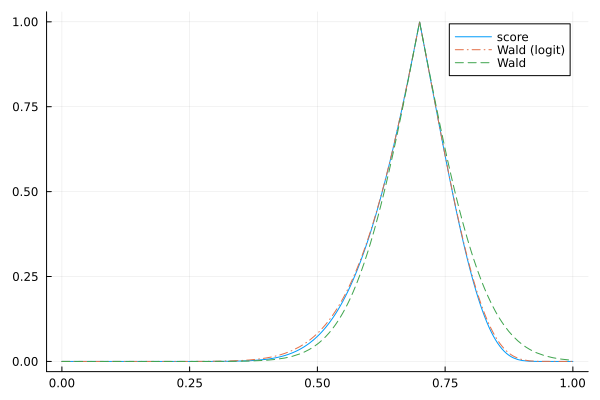

In [11]:
using Distributions
using StatsFuns
using StatsPlots
default(fmt=:png)

@inline safediv(x, y) = x == 0 ? zero(x/y) : isinf(x) ? x*sign(y) : x/y

function pvalue_score(k, n, p)
    phat = k/n
    sehat = sqrt(p*(1-p)/n)
    z = safediv(phat - p, sehat)
    2ccdf(Normal(), abs(z))
end

function pvalue_wald(k, n, p)
    phat = k/n
    sehat = sqrt(phat*(1-phat)/n)
    z = safediv(phat - p, sehat)
    2ccdf(Normal(), abs(z))
end

function pvalue_wald_logit(k, n, p)
    dlogit(x) = 1/x + 1/(1-x)
    phat = k/n
    sehat = sqrt(phat*(1-phat)/n)
    sehat_logit = abs(dlogit(phat)) * sehat
    z = safediv(logit(phat) - logit(p), sehat_logit)
    2ccdf(Normal(), abs(z))
end

k, n = 14, 20
plot()
plot!(p -> pvalue_score(k, n, p), 0, 1; label="score")
plot!(p -> pvalue_wald_logit(k, n, p); label="Wald (logit)", ls=:dashdot)
plot!(p -> pvalue_wald(k, n, p); label="Wald", ls=:dash)